**Comcast Telecom Consumer Complaints**

Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints.
The existing database will serve as a repository of public customer complaints filed against Comcast.
It will help to pin down what is wrong with Comcast's customer service.

**Data Dictionary**

*   Ticket #: Ticket number assigned to each complaint
*   Customer Complaint: Description of complaint
*   Date: Date of complaint
*   Time: Time of complaint
*   Received Via: Mode of communication of the complaint
*   City: Customer city
*   State: Customer state
*   Zipcode: Customer zip
*   Status: Status of complaint
*   Filing on behalf of someone

**Analysis Task**

To perform these tasks, you can use any of the different Python libraries such as NumPy, SciPy, Pandas, scikit-learn, matplotlib, and BeautifulSoup.

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline 

import matplotlib.pyplot as plt

In [ ]:
import os  # To get current working directory
os.getcwd()

'/content'

In [ ]:
- Import data into Python environment

In [ ]:
df = pd.read_csv('/content/Comcast_telecom_complaints_data.csv',delimiter = ',' ) # we use ',' as delimiter as it a csv file

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


- Provide the trend chart for the number of complaints at monthly and daily granularity levels.

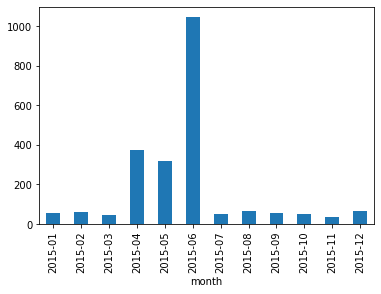

In [ ]:
df['month'] = pd.to_datetime(df['Date_month_year']).dt.to_period('M') #To create new col 'month' of MM-YYYY formath from 'Date_month_year'
df.groupby('month')['Ticket #'].count().plot.bar()  ;

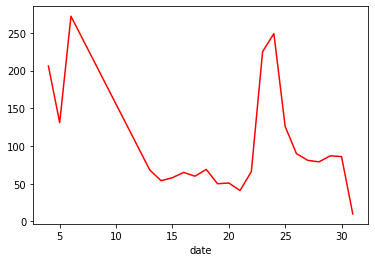

In [ ]:
df['date'] = pd.to_datetime(df['Date_month_year']).dt.day  #To create new col 'date' of DD formath from 'Date_month_year'
df.groupby('date')['Ticket #'].count().plot(kind='line' , color = 'red');

- Provide a table with the frequency of complaint types.

Which complaint types are maximum i.e., around internet, network issues, or across any other domains.

In [ ]:
df.groupby('Received Via')['Ticket #'].count() #Grouping records based on complaints "received via"

Received Via
Customer Care Call    1119
Internet              1105
Name: Ticket #, dtype: int64

- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [ ]:
df['Status2'] = df['Status'].apply(lambda x: 'Open' if ((x=='Open')| (x=='Pending')) else 'Closed') # New categorical col Status2

In [ ]:
df.head(10)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Status2
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,Closed
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Closed
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,Open
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,Closed
5,338519,ISP Charging for arbitrary data limits with ov...,06-12-15,06-Dec-15,9:59:40 PM,Internet,Acworth,Georgia,30101,Solved,No,Closed
6,361148,Throttling service and unreasonable data caps,24-06-15,24-Jun-15,10:13:55 AM,Customer Care Call,Acworth,Georgia,30101,Pending,No,Open
7,359792,Comcast refuses to help troubleshoot and corre...,23-06-15,23-Jun-15,6:56:14 PM,Internet,Adrian,Michigan,49221,Solved,No,Closed
8,318072,Comcast extended outages,06-01-15,06-Jan-15,11:46:30 PM,Customer Care Call,Alameda,California,94502,Closed,No,Closed
9,371214,Comcast Raising Prices and Not Being Available...,28-06-15,28-Jun-15,6:46:31 PM,Customer Care Call,Alameda,California,94501,Open,Yes,Open


- Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. 

In [ ]:
# df[df['Status2'] == 'Open'].groupby(['State'])['Status2'].count().to_frame()
# df[df['Status2'] == 'Closed'].groupby(['State'])['Status2'].count().to_frame()
df[df['Status2'] == 'Open'].groupby(['State'])['Status2'].count().to_frame().max()

Status2    80
dtype: int64

In [ ]:
opdf = df[df['Status2'] == 'Open'].groupby(['State'])['Status2'].count().to_frame().reset_index() # DF for open cases details
cldf = df[df['Status2'] == 'Closed'].groupby(['State'])['Status2'].count().to_frame().reset_index() # DF for closed cases details

Text(0, 0.5, 'State')

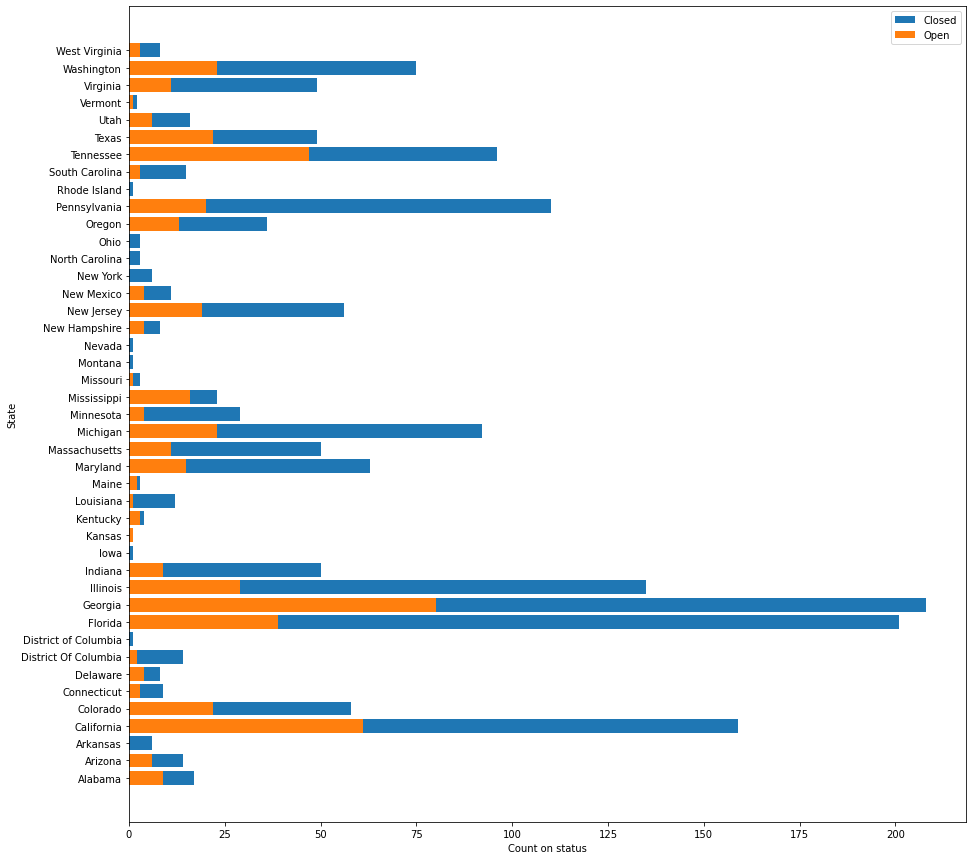

In [ ]:
fig = plt.figure(figsize=(15,15))
plt.barh(cldf.State, cldf.Status2)
plt.barh(opdf.State, opdf.Status2) # Plotting the bars stacked over
plt.legend(["Closed","Open"])
plt.xlabel("Count on status")
plt.ylabel("State")

Provide insights on:
    *   Which state has the maximum complaints 
    
    Ans : Georgia

In [ ]:
df2=df[['State','Status2']]
df2['State'].value_counts().head(10) # To get total number of complaints state-wise

Georgia         288
Florida         240
California      220
Illinois        164
Tennessee       143
Pennsylvania    130
Michigan        115
Washington       98
Colorado         80
Maryland         78
Name: State, dtype: int64

Which state has the highest percentage of unresolved complaints

Ans - California

In [ ]:
df[df['Status2'] == 'Open'].groupby(['Status2'])['State'].value_counts(normalize=True)*100  # To get % of open complaints state-wise

Status2  State               
Open     California              12.947658
         Florida                  9.641873
         Georgia                  9.641873
         Tennessee                9.090909
         Illinois                 6.336088
         Michigan                 4.958678
         Texas                    4.958678
         Washington               4.958678
         New Jersey               4.683196
         Pennsylvania             3.856749
         Maryland                 3.581267
         Colorado                 3.305785
         Massachusetts            2.754821
         Oregon                   2.754821
         Mississippi              2.479339
         Indiana                  2.203857
         Virginia                 2.203857
         Utah                     1.652893
         Alabama                  1.101928
         Delaware                 0.826446
         New Hampshire            0.826446
         New Mexico               0.826446
         West Virginia  


- Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [ ]:
df[df['Status2'] == 'Open'].groupby(['Status2'])['Received Via'].value_counts(normalize=True)*100

Status2  Received Via      
Open     Customer Care Call    51.239669
         Internet              48.760331
Name: Received Via, dtype: float64